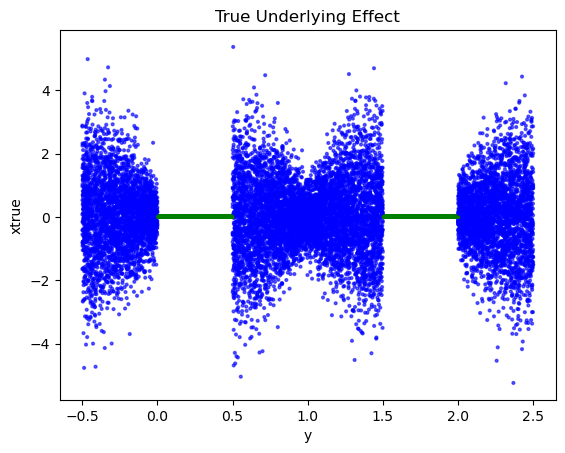

In [ ]:
import math
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from cebmf_torch.torch_cebnm.cash_solver import Cash_posterior_means   # adjust path if solver file has another name

# Reproducibility
torch.manual_seed(1)

# Generate data in PyTorch
n_samples = 20_000
y = torch.empty(n_samples).uniform_(-0.5, 2.5)        # U(-0.5, 2.5)
X = y.view(-1, 1)

# masks for zero vs nonzero regions
mask_zero = ((y > 0) & (y < 0.5)) | ((y > 1.5) & (y < 2.0))

# std depends on y
noise_std = 0.5 + torch.abs(torch.sin(math.pi * y))

# xtrue: 0 in masked regions, Gaussian elsewhere with that std
xtrue = torch.where(mask_zero, torch.zeros_like(y), torch.randn_like(y) * noise_std)

# Observed data
x = xtrue + torch.randn_like(xtrue)   # add N(0,1) noise
s = torch.ones_like(x)                # all ones
Z = torch.ones(n_samples, 1)          # design column of ones

# Plot
colors = torch.where(xtrue == 0, torch.tensor(0), torch.tensor(1))  # 0/1 labels
plt.scatter(y.cpu().numpy(), xtrue.cpu().numpy(),
            c=['green' if c == 0 else 'blue' for c in colors.tolist()],
            s=4, alpha=0.6)
plt.title('True Underlying Effect')
plt.xlabel('y'); plt.ylabel('xtrue')
plt.show()

res = Cash_posterior_means(
    X=X,
    betahat=x,
    sebetahat=s      ,
    n_epochs=50,          # keep small for testing
    n_layers=2,
    num_classes=10,
    hidden_dim=32,
    batch_size=128,
    lr=1e-3,
    penalty=1.5
)

# -------------------
# Step 3: Inspect results
# -------------------
print("Posterior means (first 10):", res.post_mean[:10])
print("Posterior sds (first 10):", res.post_sd[:10])
print("Fitted mixture weights shape:", res.pi_np.shape)

# Plot true vs posterior means
plt.figure(figsize=(6,4))
plt.scatter(y, x, alpha=0.3, label="Noisy betahat")
plt.scatter(y, xtrue, c="green", s=10, label="True effect")
plt.scatter(y, res.post_mean, c="red", s=10, label="Posterior mean")
plt.legend()
plt.xlabel("y")
plt.ylabel("effect")
plt.title("CASH posterior means vs truth")
plt.show()


KeyboardInterrupt: 

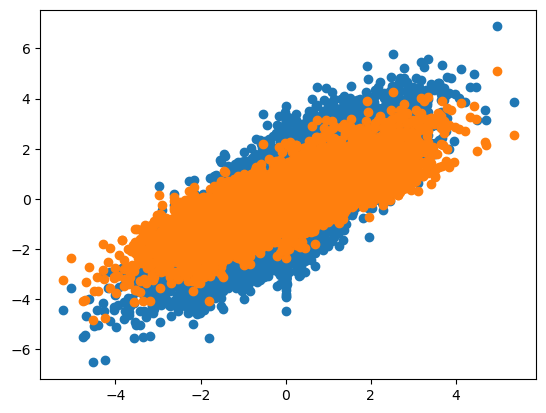

In [3]:
 
plt.scatter( xtrue, x )
plt.scatter( xtrue, res.post_mean )

tensor(0.3937)

In [5]:
tt[2:3]

tensor([3.])

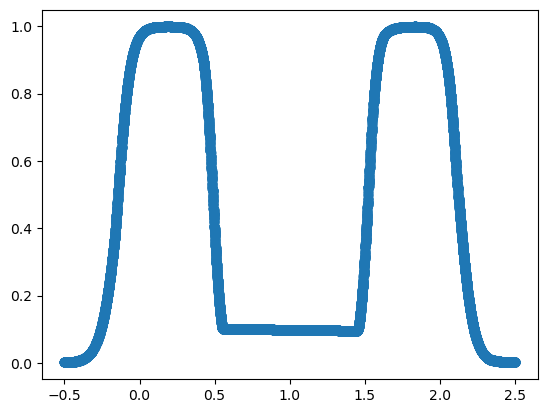

In [7]:
J = tt.shape 
K = tt.shape 

In [8]:
J

torch.Size([4])